In [230]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [231]:
df = pd.read_csv('Dataset_Creation/Dataset.csv', index_col=0)


In [232]:
X = df.iloc[:, :100*100].values.reshape(-1, 100, 100, 1)
y = df.iloc[:, -1].values

In [233]:
X.shape, y.shape
num_classes = 3

In [234]:
y
y = to_categorical(y, num_classes= 1+ df.loc[:, 'class'].unique().shape[0])

In [235]:
X

array([[[[ 29],
         [ 29],
         [ 29],
         ...,
         [ 29],
         [ 29],
         [ 29]],

        [[ 30],
         [ 39],
         [ 38],
         ...,
         [ 37],
         [ 29],
         [ 29]],

        [[ 39],
         [119],
         [112],
         ...,
         [100],
         [ 31],
         [ 29]],

        ...,

        [[ 42],
         [149],
         [148],
         ...,
         [242],
         [ 36],
         [ 29]],

        [[ 42],
         [150],
         [151],
         ...,
         [242],
         [ 36],
         [ 29]],

        [[ 30],
         [ 33],
         [ 33],
         ...,
         [ 37],
         [ 29],
         [  0]]],


       [[[ 29],
         [ 29],
         [ 29],
         ...,
         [ 29],
         [ 29],
         [ 29]],

        [[ 30],
         [ 39],
         [ 38],
         ...,
         [ 37],
         [ 29],
         [ 29]],

        [[ 39],
         [119],
         [112],
         ...,
         [100],
         [

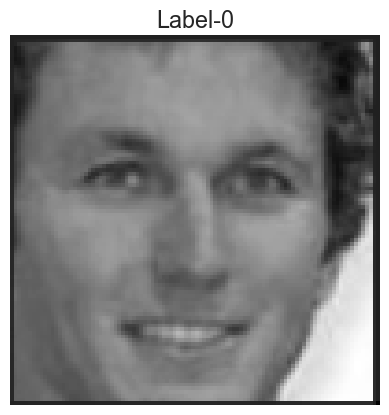

(21435, 301)


In [236]:
q = np.random.randint(19)
plt.imshow(X[q][:,:,0], cmap='gray')
plt.title(f'Label-{np.argmax(y[q])}')
plt.axis('off')
plt.show()
print(y.shape)


In [237]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')
print(y_train.shape)

Train Size - (18219, 100, 100, 1)
Test Size - (3216, 100, 100, 1)
(18219, 301)


In [238]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)

valid_datagen = ImageDataGenerator(rescale=1./255.)


In [239]:
from datetime import datetime 


In [240]:
noOfClasses = 1679

In [241]:
# dataGen = ImageDataGenerator(width_shift_range=0.1,
#                             height_shift_range=0.1,
#                             zoom_range= 0.1,
#                             rotation_range= 10)
#
# dataGen.fit(X_train)
#
# y_train = to_categorical(y_train,noOfClasses)
# y_test = to_categorical(y_test,noOfClasses)
# #y_validation = to_categorical(y_validation,noOfClasses)
#
# model = Sequential()
# model.add(Conv2D(input_shape = (100,100,1), filters = 8, kernel_size = (5,5),activation = "relu", padding = "same" ))
# model.add(MaxPooling2D(pool_size = (2,2)))
#
# model.add(Conv2D(filters = 8, kernel_size = (3,3),activation = "relu", padding = "same" ))
# model.add(MaxPooling2D(pool_size = (2,2)))
#
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(units = 256, activation = "relu"))
# model.add(Dropout(0.2))
# model.add(Dense(units = 4, activation = "softmax"))
#
# model.compile(loss = "categorical_crossentropy", optimizer=("Adam"), metrics = ["accuracy"])
#
# batch_size = 250
#
# hist = model.fit_generator(dataGen.flow(X_train, y_train, batch_size = batch_size),
#                                       validation_data = (X_test, y_test),
#                                       epochs = 15, steps_per_epoch = X_train.shape[0]//batch_size, shuffle = 1)

In [242]:

num_classes = 1680
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

In [243]:
model = Sequential(name = model_name)

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(100, 100, 1)))
model.add(BatchNormalization()) #----------------
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) #----------------
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization()) #----------------
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) #----------------

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(301, activation='softmax'))

model.summary()

Model: "Face_trained_model_01_56_25_"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 98, 98, 64)        640       
                                                                 
 batch_normalization_114 (Ba  (None, 98, 98, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_92 (Conv2D)          (None, 96, 96, 64)        36928     
                                                                 
 batch_normalization_115 (Ba  (None, 96, 96, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_93 (Conv2D)          (None, 96, 96, 64)        102464    
                                                                 
 batch_normalization_116 (Ba  (None, 9

In [244]:

learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [245]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

ch = ModelCheckpoint('models/'+model_name+'.h5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/"+datetime.now().strftime("%Y%m%d-%H%M%S"))


In [246]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)

valid_datagen = ImageDataGenerator(rescale=1./255.)

In [247]:

X_train = X_train.reshape(-1,100,100,1)
X_test = X_test.reshape(-1,100,100,1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(18219, 100, 100, 1)
(3216, 100, 100, 1)
(3216, 301)
(18219, 301)


In [248]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [249]:
# model.compile(optimizer='rmsprop',
#     loss=None,
#     metrics=None,
#     loss_weights=None,
#     weighted_metrics=None,
#     run_eagerly=True,
#     steps_per_execution=None,
#     jit_compile=None,)

In [250]:

tf.config.run_functions_eagerly(False)



In [251]:
X.shape

(21435, 100, 100, 1)

In [252]:
epochs = 50
batch_size = 256
history = model.fit(train_datagen.flow(X, y, batch_size=batch_size),
                              steps_per_epoch= X_train.shape[0]//batch_size,
                              epochs=epochs,
                              validation_data=valid_datagen.flow(X_test, y_test),
                              validation_steps=50,
                              verbose = 1,
                              callbacks=[learning_rate_reduction, es, ch, tensorboard_callback]
                            )

Epoch 1/50
71/71 [==============================] - ETA: 0s - loss: 5.1478 - accuracy: 0.0715WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 126s 2s/step - loss: 5.1478 - accuracy: 0.0715 - val_loss: 8.5257 - val_accuracy: 0.0262 - lr: 0.0010
Epoch 2/50
71/71 [==============================] - ETA: 0s - loss: 4.3842 - accuracy: 0.1418WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 121s 2s/step - loss: 4.3842 - accuracy: 0.1418 - val_loss: 16.2920 - val_accuracy: 0.0137 - lr: 0.0010
Epoch 3/50
71/71 [==============================] - ETA: 0s - loss: 3.7163 - accuracy: 0.2260WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 121s 2s/step - loss: 3.7163 - accuracy: 0.2260 - val_loss: 12.6173 - val_accuracy: 0.0337 - lr: 0.0010
Epoch 4/50
71/71 [==============================] - ETA: 0s - loss: 3.0348 - accuracy: 0.3305WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 3.0348 - accuracy: 0.3305 - val_loss: 7.7220 - val_accuracy: 0.0381 - lr: 0.0010
Epoch 5/50
71/71 [==============================] - ETA: 0s - loss: 2.3497 - accuracy: 0.4705WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 121s 2s/step - loss: 2.3497 - accuracy: 0.4705 - val_loss: 8.3678 - val_accuracy: 0.0319 - lr: 0.0010
Epoch 6/50
71/71 [==============================] - ETA: 0s - loss: 1.7622 - accuracy: 0.6143WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 1.7622 - accuracy: 0.6143 - val_loss: 9.2114 - val_accuracy: 0.0356 - lr: 0.0010
Epoch 7/50
71/71 [==============================] - ETA: 0s - loss: 1.2335 - accuracy: 0.7457WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 121s 2s/step - loss: 1.2335 - accuracy: 0.7457 - val_loss: 5.8005 - val_accuracy: 0.0763 - lr: 0.0010
Epoch 8/50
71/71 [==============================] - ETA: 0s - loss: 0.8619 - accuracy: 0.8298WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.8619 - accuracy: 0.8298 - val_loss: 3.8023 - val_accuracy: 0.1675 - lr: 0.0010
Epoch 9/50
71/71 [==============================] - ETA: 0s - loss: 0.6056 - accuracy: 0.8852WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.6056 - accuracy: 0.8852 - val_loss: 1.6006 - val_accuracy: 0.5562 - lr: 0.0010
Epoch 10/50
71/71 [==============================] - ETA: 0s - loss: 0.4312 - accuracy: 0.9171WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.4312 - accuracy: 0.9171 - val_loss: 0.5661 - val_accuracy: 0.8675 - lr: 0.0010
Epoch 11/50
71/71 [==============================] - ETA: 0s - loss: 0.3189 - accuracy: 0.9404WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.3189 - accuracy: 0.9404 - val_loss: 0.3967 - val_accuracy: 0.9081 - lr: 0.0010
Epoch 12/50
71/71 [==============================] - ETA: 0s - loss: 0.2561 - accuracy: 0.9480WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.2561 - accuracy: 0.9480 - val_loss: 0.1330 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 13/50
71/71 [==============================] - ETA: 0s - loss: 0.2037 - accuracy: 0.9597WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.2037 - accuracy: 0.9597 - val_loss: 0.2414 - val_accuracy: 0.9437 - lr: 0.0010
Epoch 14/50
71/71 [==============================] - ETA: 0s - loss: 0.1701 - accuracy: 0.9667WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.1701 - accuracy: 0.9667 - val_loss: 0.2959 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 15/50
71/71 [==============================] - ETA: 0s - loss: 0.1444 - accuracy: 0.9707WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 121s 2s/step - loss: 0.1444 - accuracy: 0.9707 - val_loss: 4.7470 - val_accuracy: 0.2719 - lr: 0.0010
Epoch 16/50
71/71 [==============================] - ETA: 0s - loss: 0.1278 - accuracy: 0.9733WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 121s 2s/step - loss: 0.1278 - accuracy: 0.9733 - val_loss: 0.4573 - val_accuracy: 0.8950 - lr: 0.0010
Epoch 17/50
71/71 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9781WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 122s 2s/step - loss: 0.1087 - accuracy: 0.9781 - val_loss: 0.1353 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 18/50
71/71 [==============================] - ETA: 0s - loss: 0.1017 - accuracy: 0.9782WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.1017 - accuracy: 0.9782 - val_loss: 0.0966 - val_accuracy: 0.9744 - lr: 0.0010
Epoch 19/50
71/71 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9828WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0853 - accuracy: 0.9828 - val_loss: 0.0257 - val_accuracy: 0.9969 - lr: 0.0010
Epoch 20/50
71/71 [==============================] - ETA: 0s - loss: 0.0817 - accuracy: 0.9833WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0817 - accuracy: 0.9833 - val_loss: 3.2050 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 21/50
71/71 [==============================] - ETA: 0s - loss: 0.0726 - accuracy: 0.9843WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0726 - accuracy: 0.9843 - val_loss: 0.3519 - val_accuracy: 0.9087 - lr: 0.0010
Epoch 22/50
71/71 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9824WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.0755 - accuracy: 0.9824 - val_loss: 0.7787 - val_accuracy: 0.7887 - lr: 0.0010
Epoch 23/50
71/71 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 0.9861WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0624 - accuracy: 0.9861 - val_loss: 0.0099 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 24/50
71/71 [==============================] - ETA: 0s - loss: 0.0570 - accuracy: 0.9887WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0570 - accuracy: 0.9887 - val_loss: 1.0542 - val_accuracy: 0.7556 - lr: 0.0010
Epoch 25/50
71/71 [==============================] - ETA: 0s - loss: 0.0511 - accuracy: 0.9893WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0511 - accuracy: 0.9893 - val_loss: 0.5919 - val_accuracy: 0.8431 - lr: 0.0010
Epoch 26/50
71/71 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9892WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0482 - accuracy: 0.9892 - val_loss: 0.4648 - val_accuracy: 0.8769 - lr: 0.0010
Epoch 27/50
71/71 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.9894WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.0460 - accuracy: 0.9894 - val_loss: 0.0578 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 28/50
71/71 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9883WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0469 - accuracy: 0.9883 - val_loss: 0.2489 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 29/50
71/71 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 0.9901WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0462 - accuracy: 0.9901 - val_loss: 0.0389 - val_accuracy: 0.9881 - lr: 0.0010
Epoch 30/50
71/71 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9897WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0437 - accuracy: 0.9897 - val_loss: 0.0515 - val_accuracy: 0.9875 - lr: 0.0010
Epoch 31/50
71/71 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9904WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.0409 - accuracy: 0.9904 - val_loss: 0.1020 - val_accuracy: 0.9663 - lr: 0.0010
Epoch 32/50
71/71 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9921WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.0343 - accuracy: 0.9921 - val_loss: 0.4269 - val_accuracy: 0.8669 - lr: 0.0010
Epoch 33/50
71/71 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 0.9922WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0346 - accuracy: 0.9922 - val_loss: 0.0141 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 34/50
71/71 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9928WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0322 - accuracy: 0.9928 - val_loss: 0.0459 - val_accuracy: 0.9875 - lr: 0.0010
Epoch 35/50
71/71 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9923WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0337 - accuracy: 0.9923 - val_loss: 0.3744 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 36/50
71/71 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9923WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0315 - accuracy: 0.9923 - val_loss: 0.0329 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 37/50
71/71 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9926WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0306 - accuracy: 0.9926 - val_loss: 0.0299 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 38/50
71/71 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9926WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0284 - accuracy: 0.9926 - val_loss: 1.4053 - val_accuracy: 0.7556 - lr: 0.0010
Epoch 39/50
71/71 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9936WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0281 - accuracy: 0.9936 - val_loss: 0.0573 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 40/50
71/71 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9938WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0280 - accuracy: 0.9938 - val_loss: 1.3761 - val_accuracy: 0.7219 - lr: 0.0010
Epoch 41/50
71/71 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9930WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0274 - accuracy: 0.9930 - val_loss: 0.1703 - val_accuracy: 0.9487 - lr: 0.0010
Epoch 42/50
71/71 [==============================] - ETA: 0s - loss: 0.0268 - accuracy: 0.9939WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0268 - accuracy: 0.9939 - val_loss: 0.0708 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 43/50
71/71 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9941WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0267 - accuracy: 0.9941 - val_loss: 0.5939 - val_accuracy: 0.8331 - lr: 0.0010
Epoch 44/50
71/71 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9945WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0244 - accuracy: 0.9945 - val_loss: 0.0164 - val_accuracy: 0.9969 - lr: 0.0010
Epoch 45/50
71/71 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9939WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0230 - accuracy: 0.9939 - val_loss: 0.0134 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 46/50
71/71 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9956WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0211 - accuracy: 0.9956 - val_loss: 0.0074 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 47/50
71/71 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9954WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0213 - accuracy: 0.9954 - val_loss: 2.2836 - val_accuracy: 0.5888 - lr: 0.0010
Epoch 48/50
71/71 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9954WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 120s 2s/step - loss: 0.0215 - accuracy: 0.9954 - val_loss: 0.0474 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 49/50
71/71 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9960WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0181 - accuracy: 0.9960 - val_loss: 1.1977 - val_accuracy: 0.7075 - lr: 0.0010
Epoch 50/50
71/71 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9952WARNING:tensorflow:Can save best model only with val_acc available, skipping.


71/71 [==============================] - 119s 2s/step - loss: 0.0205 - accuracy: 0.9952 - val_loss: 0.0340 - val_accuracy: 0.9912 - lr: 0.0010


In [253]:
loss, acc = model.evaluate(valid_datagen.flow(X_test, y_test))

print(f'Loss: {loss}\nAccuracy: {acc*100}')

101/101 [==============================] - 7s 70ms/step - loss: 0.0336 - accuracy: 0.9894
Loss: 0.03361140191555023
Accuracy: 98.94278645515442


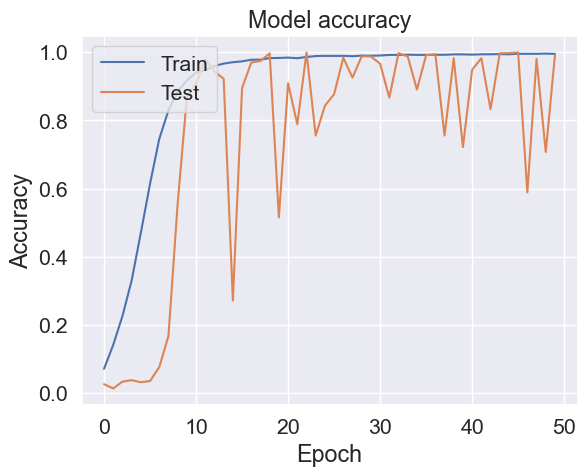

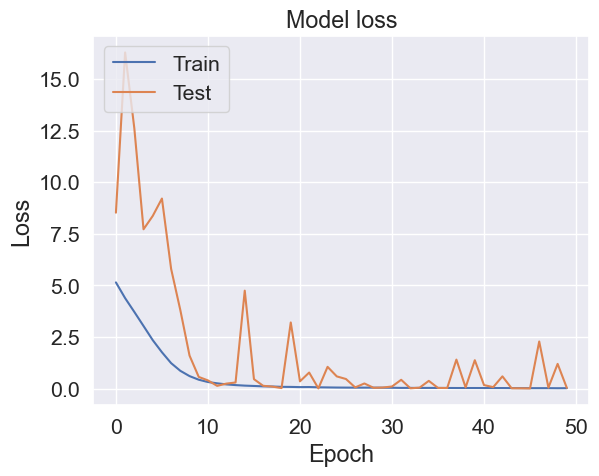

In [254]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [255]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

In [256]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test),axis=1)))

101/101 [==============================] - 7s 63ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        47
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00  

/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

101/101 [==============================] - 6s 62ms/step


<Axes: xlabel='Predicted', ylabel='Actual'>

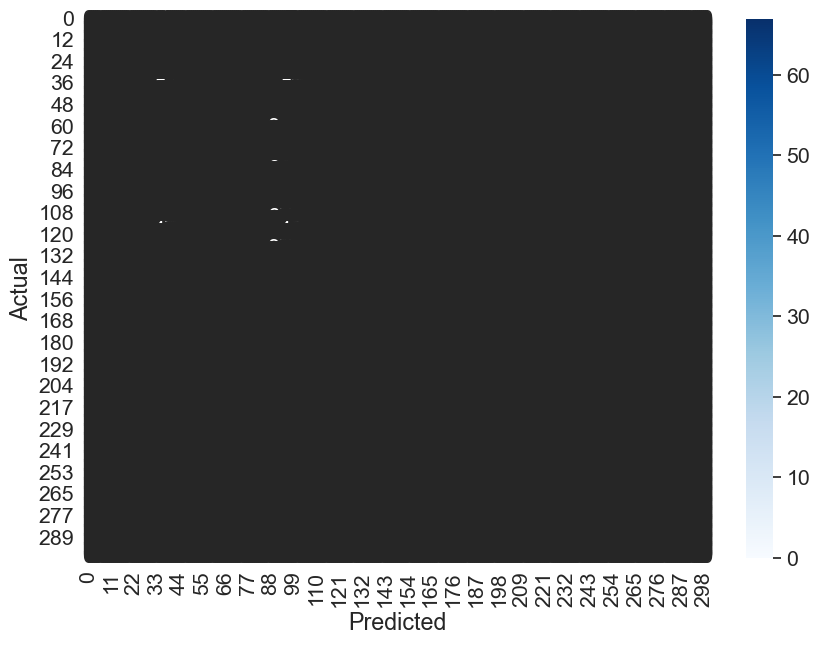

In [257]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
import seaborn as sn
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [258]:
print(f1_score(y_true, y_pred, average="macro")*100)
print(precision_score(y_true, y_pred, average="macro")*100)
print(recall_score(y_true, y_pred, average="macro")*100)

0.2121677434395664
0.17797984478112255
0.928214822354709


/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


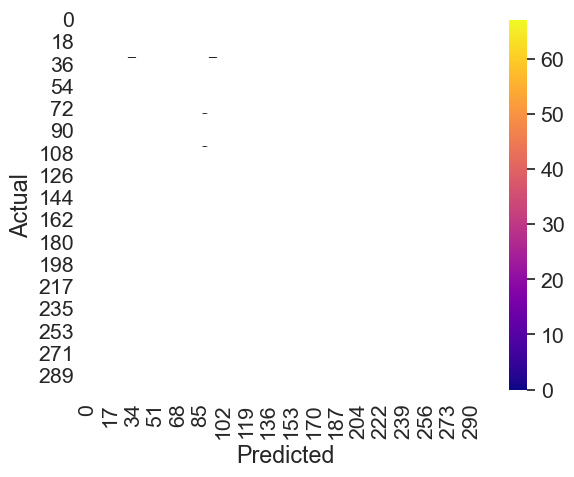

In [259]:
sn.heatmap(df_cm, annot=True, fmt="d", cmap="plasma");


In [260]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
def AA_andEachClassAccuracy(confusion_matrix):
    from operator import truediv
    counter = confusion_matrix.shape[0]
    list_diag = np.diag(confusion_matrix)
    list_raw_sum = np.sum(confusion_matrix, axis=1)
    each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
    average_acc = np.mean(each_acc)
    return each_acc, average_acc

def reports (nn_model, X_test,y_test):
    #start = time.time()
    Y_pred = nn_model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)
    #end = time.time()
    #print(end - start

    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['1', '2','3','4'])
    target_names=['1', '2','3','4']
    oa = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    each_acc, aa = AA_andEachClassAccuracy(confusion)
    kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)
    score = nn_model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss =  score[0]
    Test_accuracy = score[1]*100

    return classification, confusion, Test_Loss, Test_accuracy, oa*100, '\n'.join([' : '.join(map(str, i)) for i in zip(target_names, each_acc*100)]), aa*100, kappa*100



classification, confusion, Test_loss, Test_accuracy, oa, each_acc, aa, kappa = reports(model, X_test, y_test)
classification = str(classification)
confusion = str(confusion)
file_name = "Face_Classification_report.txt"

with open(file_name, 'w') as x_file:
    x_file.write('\nTest loss: {}%'.format(Test_loss))
    x_file.write('\n')
    x_file.write('Test accuracy: {}%'.format(Test_accuracy))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('Kappa accuracy: {}%'.format(kappa))
    x_file.write('\n')
    x_file.write('Overall accuracy: {}%'.format(oa))
    x_file.write('\n')
    x_file.write('Average accuracy: {}%'.format(aa))
    x_file.write('\n\n')
    x_file.write('Classwise Accuracy: \n{}'.format(each_acc))
    x_file.write('\n\n')
    x_file.write('Classification Report:\n{}'.format(classification))
    x_file.write('\n\n')
    x_file.write('Confusion Matrix:\n{}'.format(confusion))

101/101 [==============================] - 6s 64ms/step


ValueError: Number of classes, 299, does not match size of target_names, 4. Try specifying the labels parameter

1/1 [==============================] - 0s 476ms/step


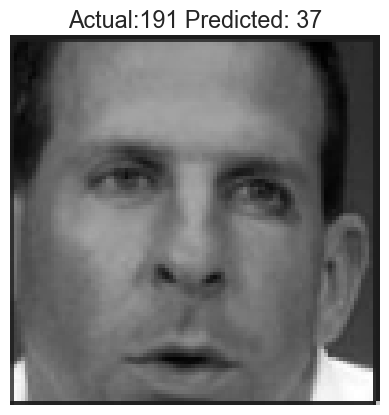

In [261]:
# Verify
rand_n = np.random.randint(X_test.shape[0])
plt.imshow(X_test[rand_n][:, :, 0], cmap='gray')
plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
plt.axis('off')
plt.show()

In [262]:
def plot_predictions(r=5 ,c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(12, 12))
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(X_test.shape[0])
      plt.imshow(X_test[rand_n][:, :, 0], cmap='gray')
      plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
      plt.axis('off')
  plt.show()

In [263]:
# serialize weights to HDF5
model.save(model_name+".h5")
print("Model Saved to disk")

Model Saved to disk


In [264]:
from tensorflow.keras.models import load_model
model1 = load_model("Face_trained_model_12_18_34_.h5")

In [265]:
tf.keras.utils.plot_model(
    model1,
    to_file='model_with_shapes.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [266]:
loss, acc = model1.evaluate(valid_datagen.flow(X_test, y_test))

101/101 [==============================] - 8s 71ms/step - loss: 0.1391 - accuracy: 0.9605


In [267]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(model1.predict(X_test), axis=1)))

101/101 [==============================] - 7s 66ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        47
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00  

/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manideepguntuku/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [268]:
model1.summary()

Model: "Face_trained_model_12_18_34_"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 98, 98, 64)        640       
                                                                 
 batch_normalization_96 (Bat  (None, 98, 98, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_78 (Conv2D)          (None, 96, 96, 64)        36928     
                                                                 
 batch_normalization_97 (Bat  (None, 96, 96, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_79 (Conv2D)          (None, 96, 96, 64)        102464    
                                                                 
 batch_normalization_98 (Bat  (None, 9

In [269]:
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model1.layers[:20]]
activation_model = Model(inputs=model1.input, outputs=layer_outputs)

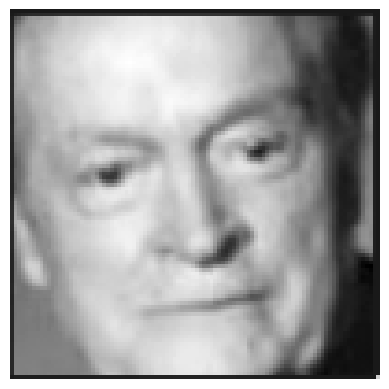

In [270]:
plt.imshow(X_test[28][:,:,0], cmap='gray');
plt.axis('off');

In [271]:
activations = activation_model.predict(X_test[28].reshape(-1, 100, 100, 1))

1/1 [==============================] - 0s 429ms/step


In [272]:
count =0
for layer in activations:
  count+=1
  print('Layer:%2d    Shape: %s ' %(count, str(layer.shape)))

Layer: 1    Shape: (1, 98, 98, 64) 
Layer: 2    Shape: (1, 98, 98, 64) 
Layer: 3    Shape: (1, 96, 96, 64) 
Layer: 4    Shape: (1, 96, 96, 64) 
Layer: 5    Shape: (1, 96, 96, 64) 
Layer: 6    Shape: (1, 96, 96, 64) 
Layer: 7    Shape: (1, 48, 48, 64) 
Layer: 8    Shape: (1, 48, 48, 64) 
Layer: 9    Shape: (1, 46, 46, 128) 
Layer:10    Shape: (1, 46, 46, 128) 
Layer:11    Shape: (1, 44, 44, 128) 
Layer:12    Shape: (1, 44, 44, 128) 
Layer:13    Shape: (1, 44, 44, 128) 
Layer:14    Shape: (1, 44, 44, 128) 
Layer:15    Shape: (1, 22, 22, 128) 
Layer:16    Shape: (1, 22, 22, 128) 
Layer:17    Shape: (1, 20, 20, 256) 
Layer:18    Shape: (1, 20, 20, 256) 
Layer:19    Shape: (1, 10, 10, 256) 
Layer:20    Shape: (1, 10, 10, 256) 


/var/folders/hm/_fq8_bw50sn5kdfjqvjrygdw0000gn/T/ipykernel_66453/2760698350.py:16: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/var/folders/hm/_fq8_bw50sn5kdfjqvjrygdw0000gn/T/ipykernel_66453/2760698350.py:16: RuntimeWarning: divide by zero encountered in divide
  channel_image /= channel_image.std()


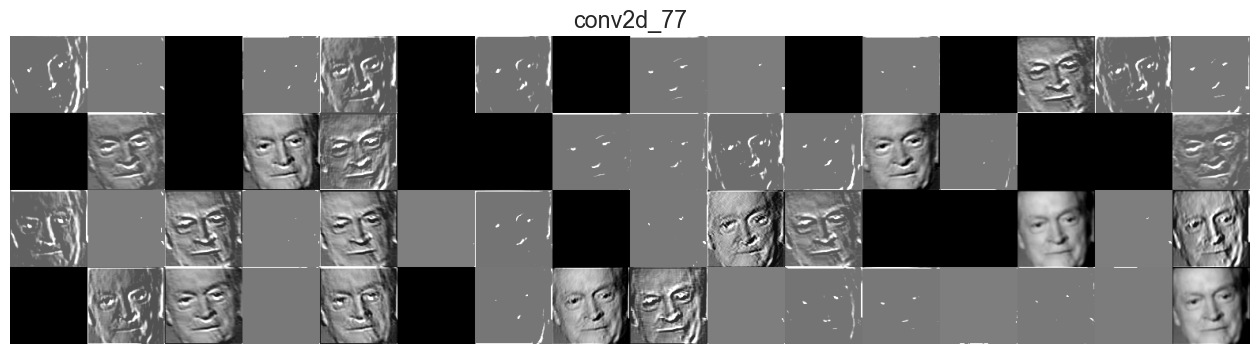

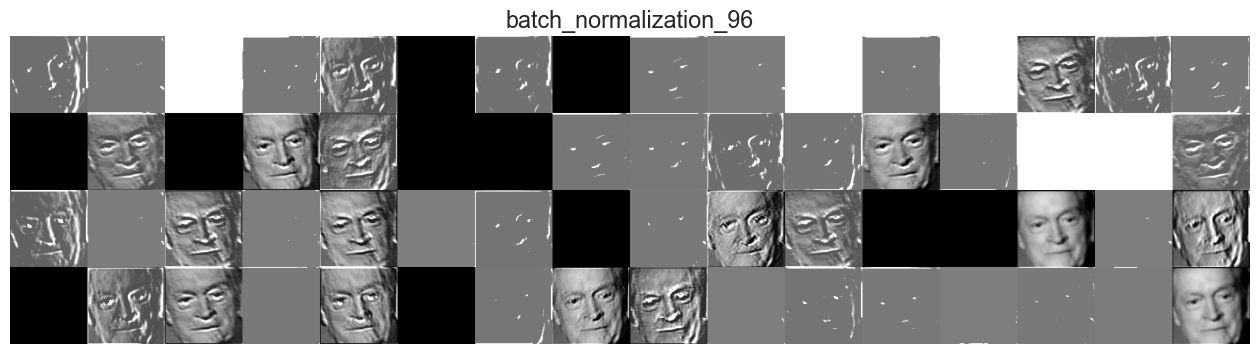

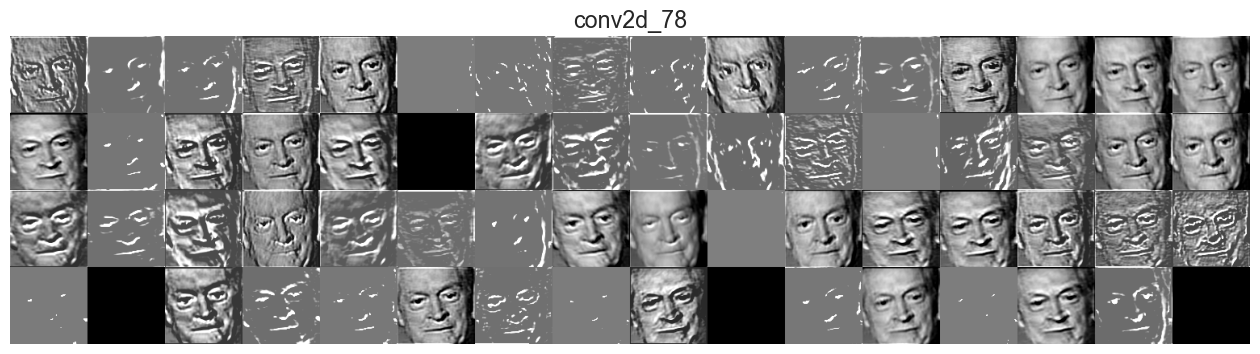

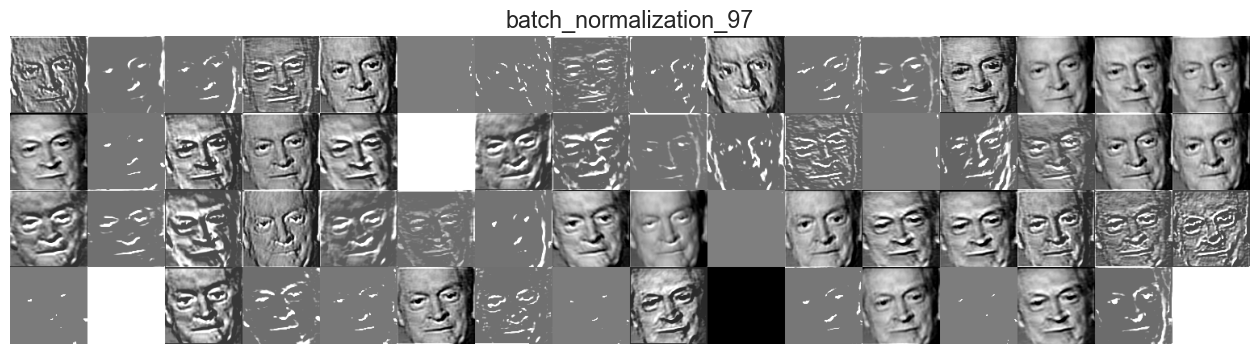

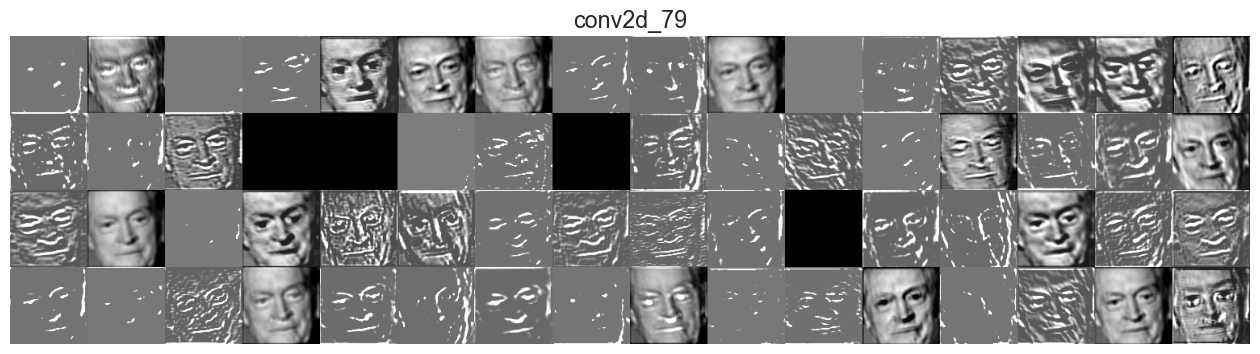

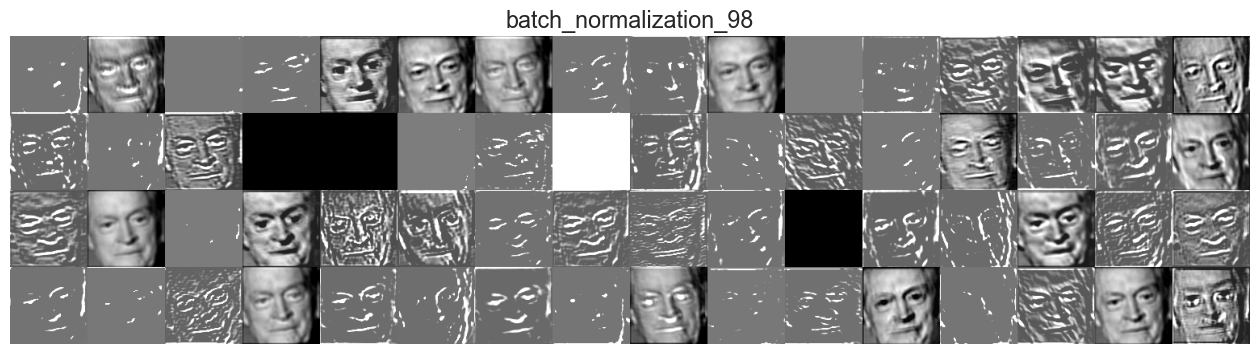

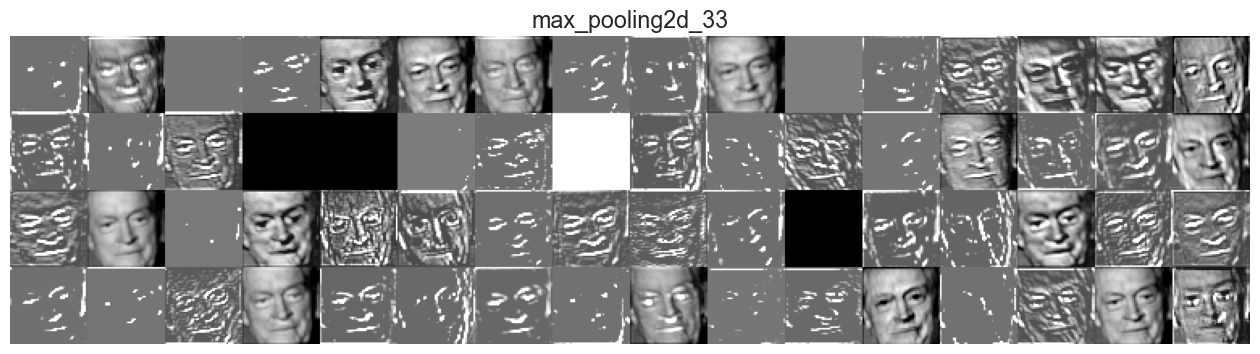

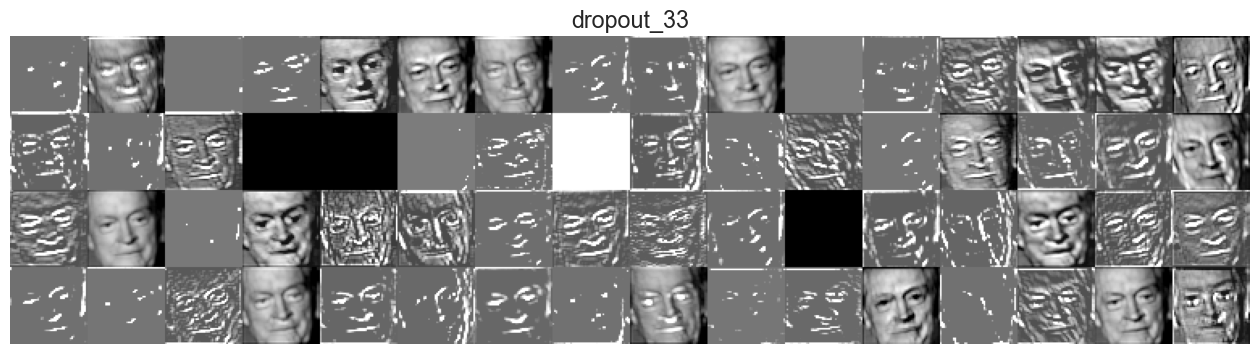

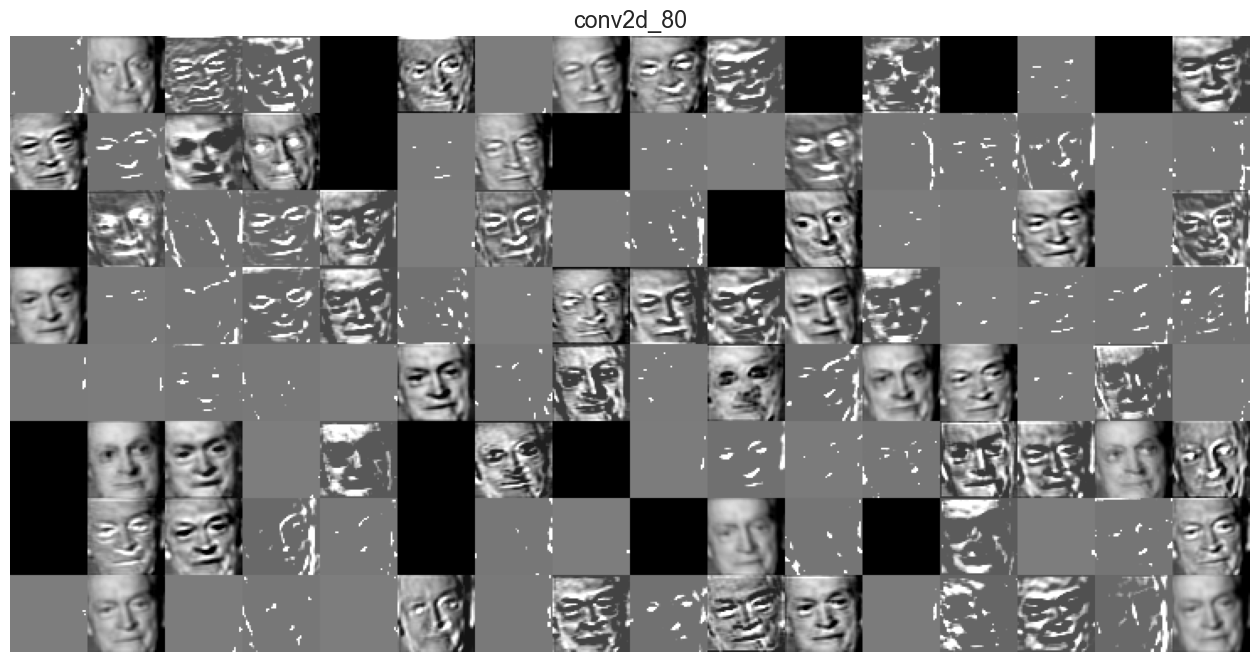

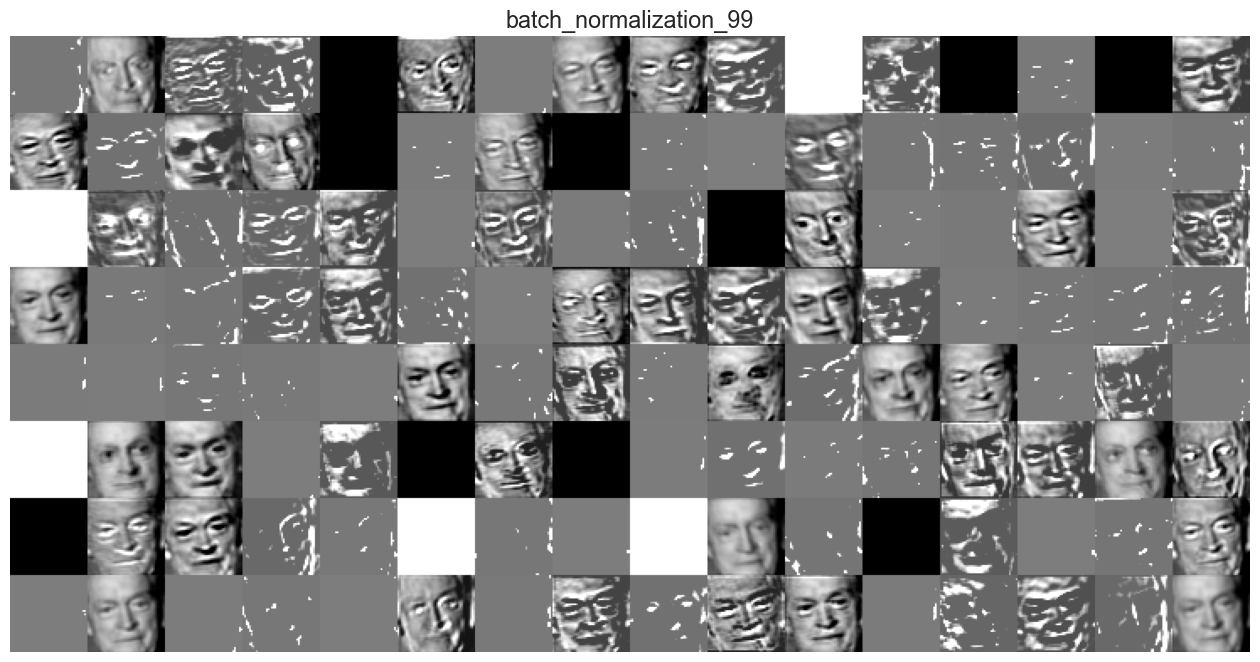

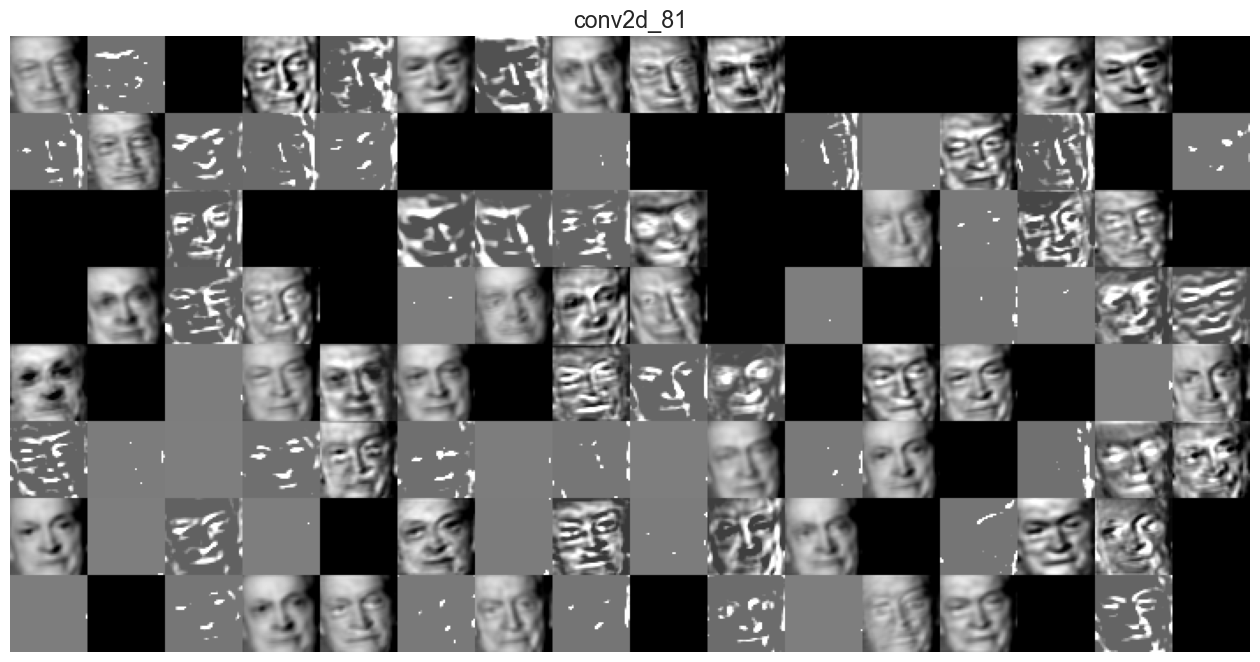

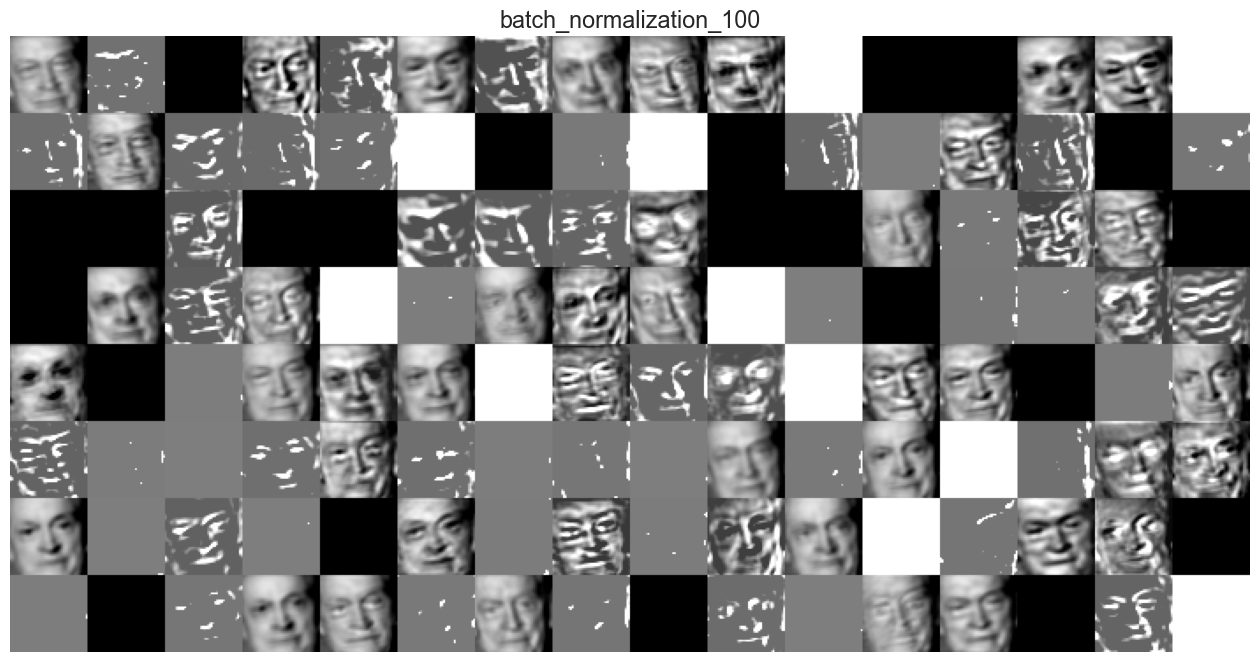

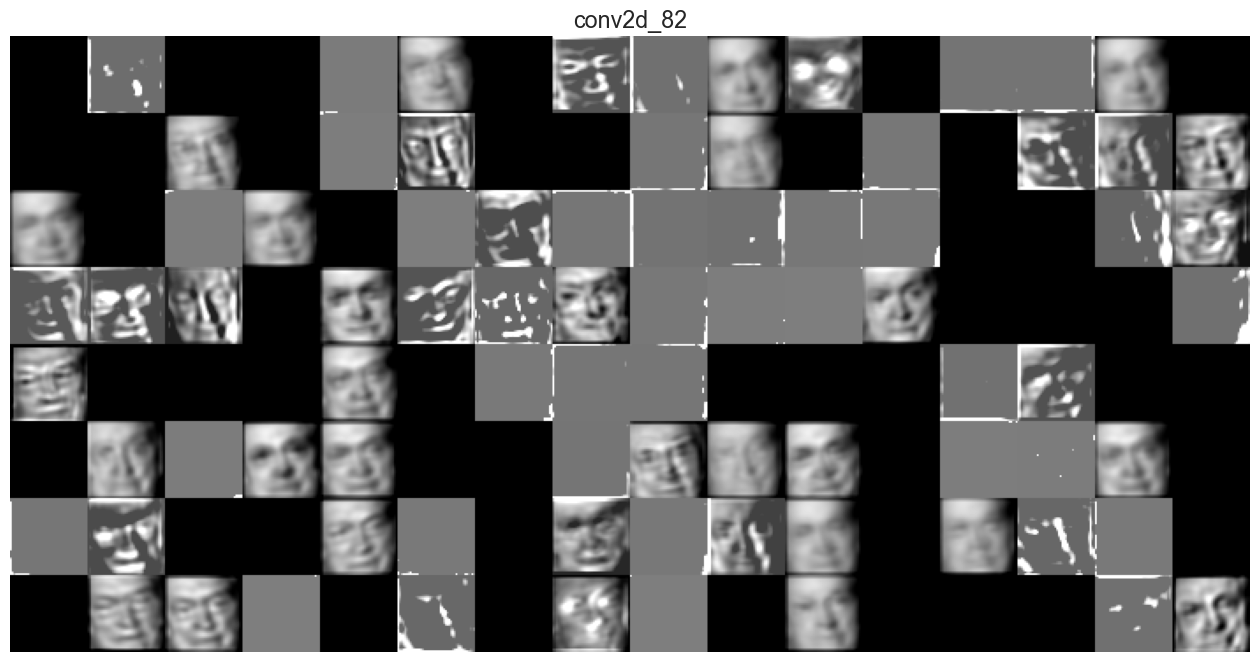

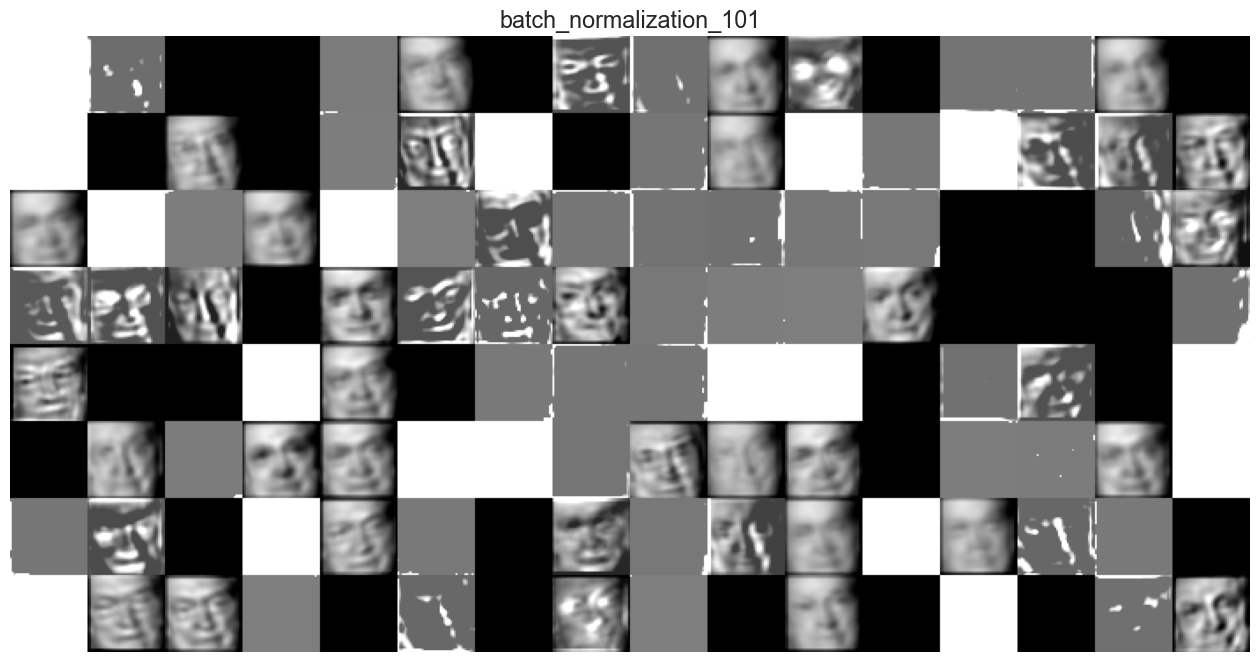

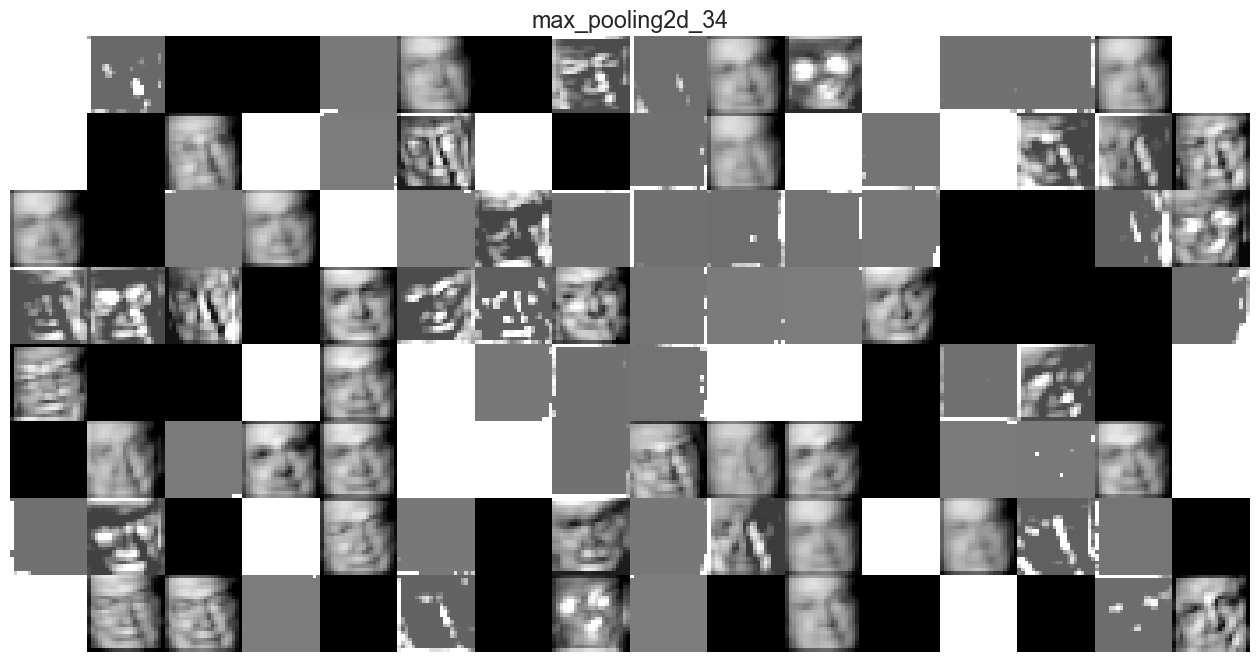

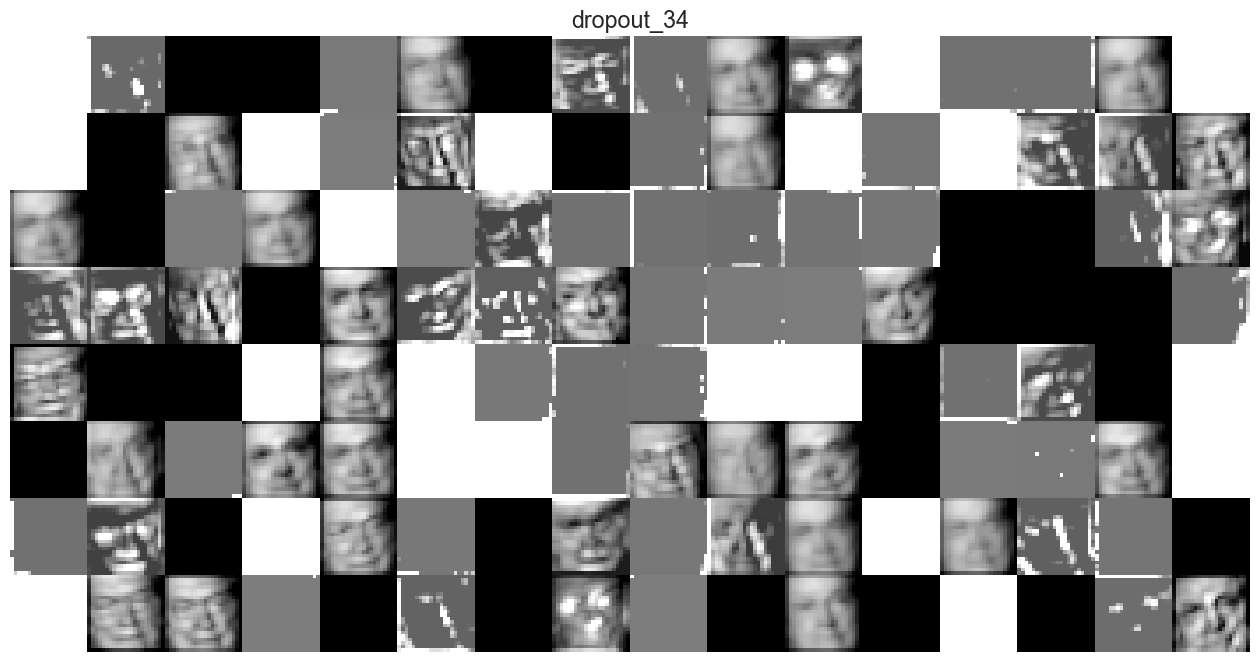

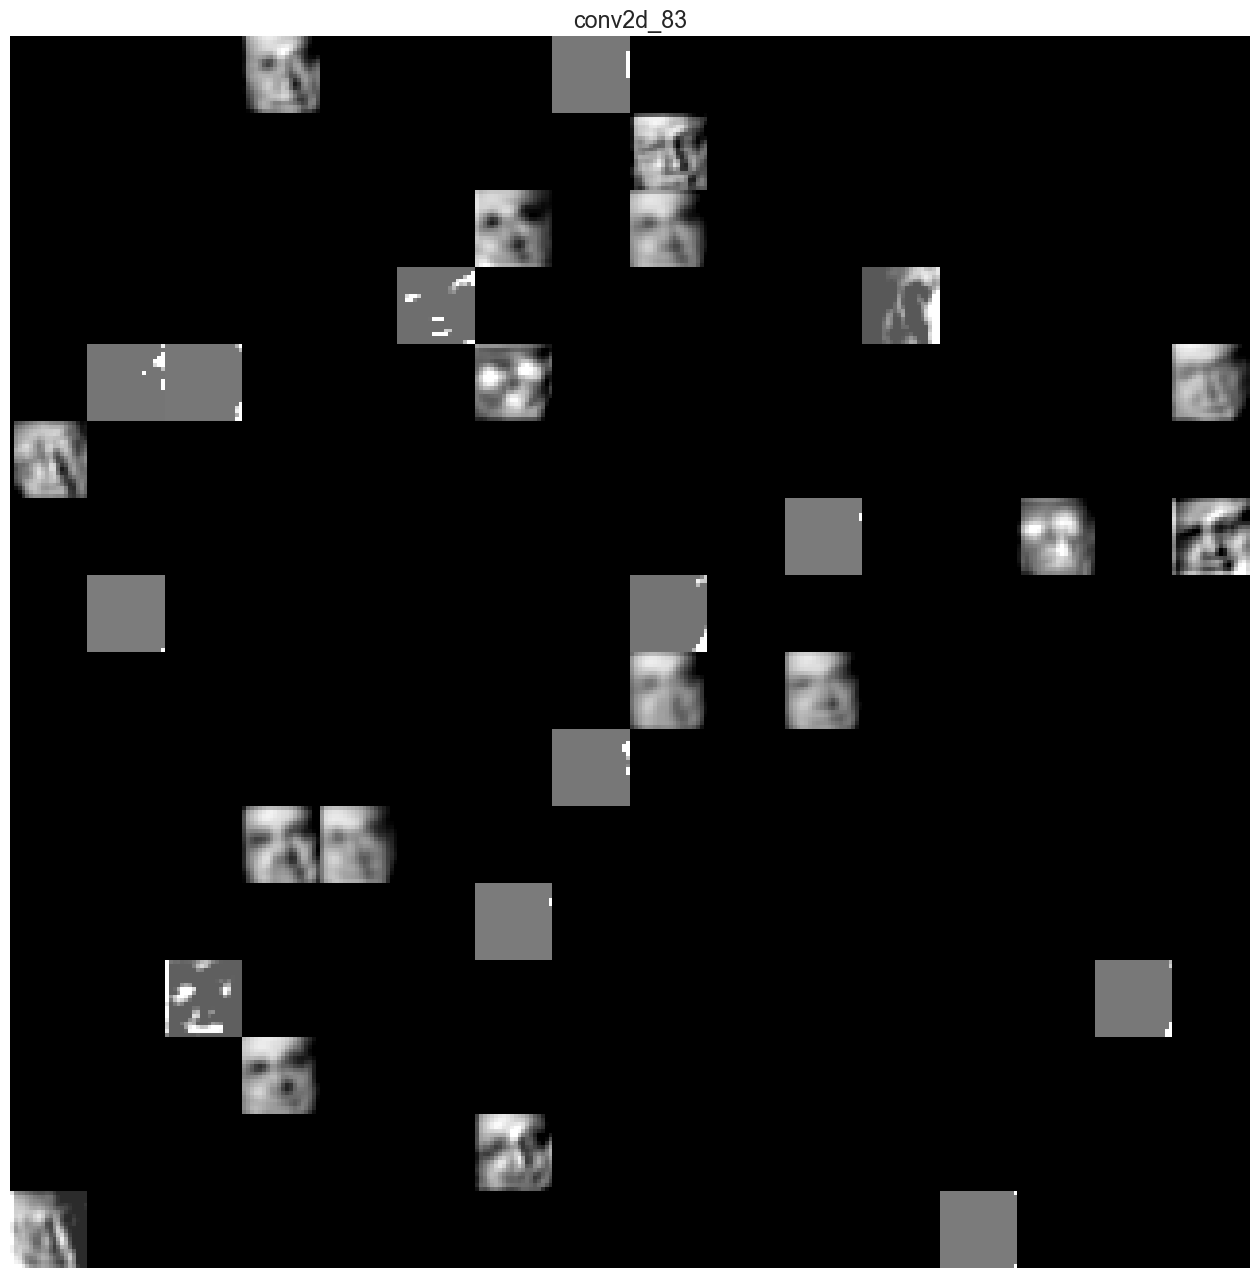

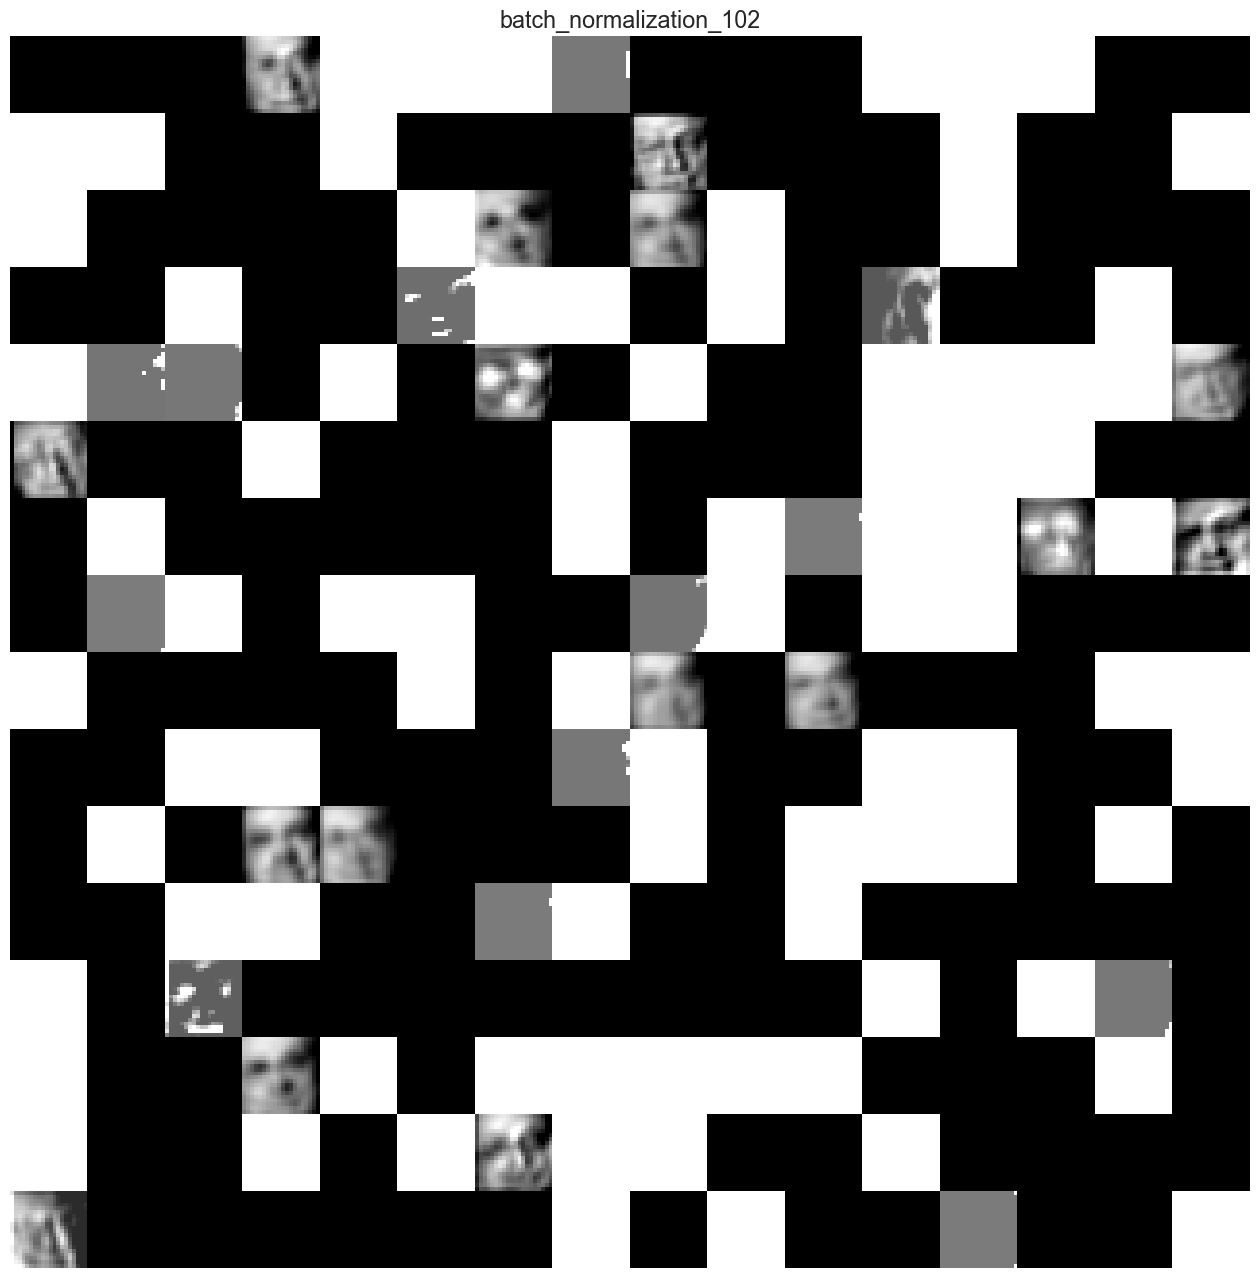

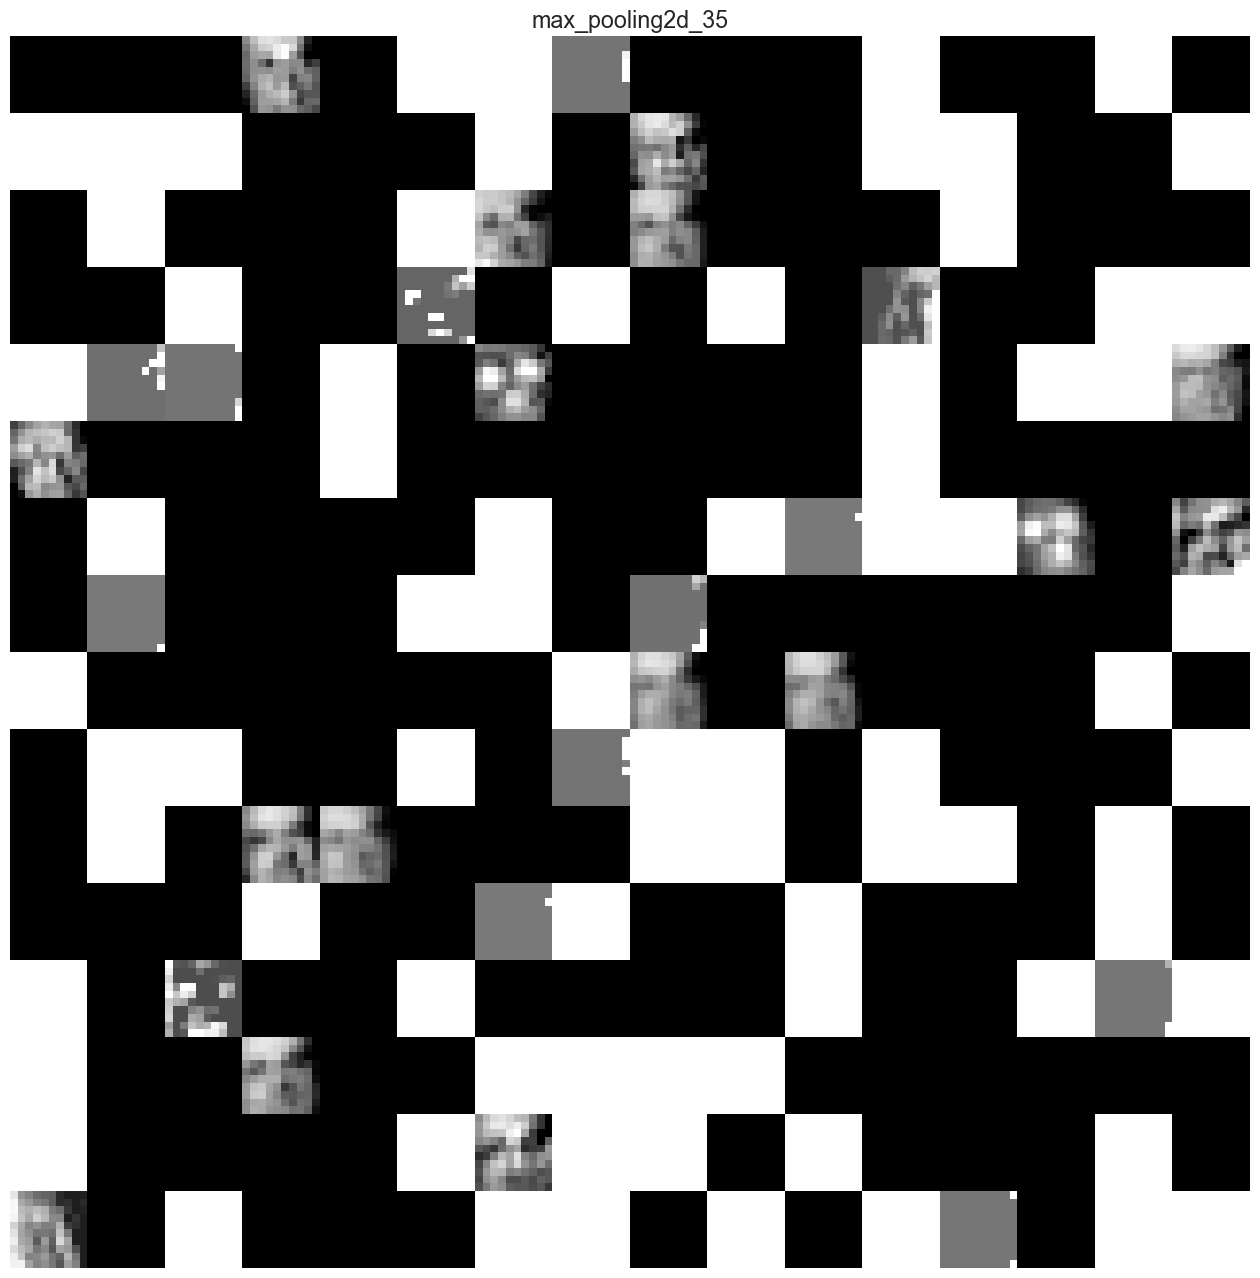

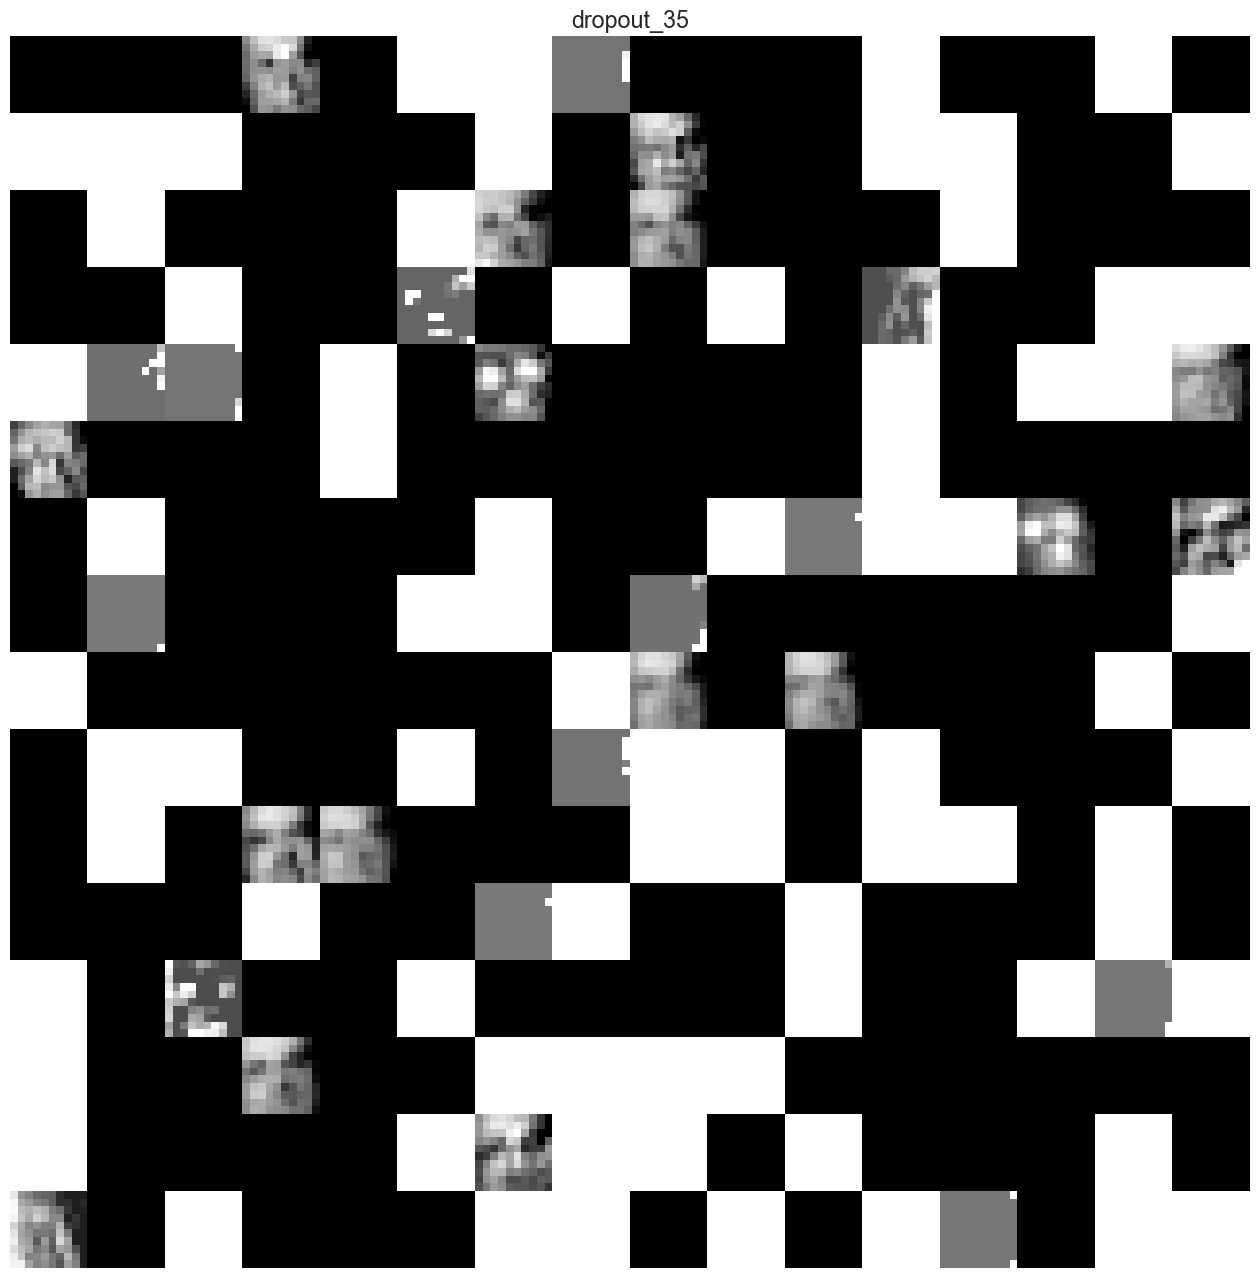

In [273]:
layer_names = []
for layer in model1.layers[:20]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(display_grid, aspect='auto', cmap='gray')
    plt.savefig(layer_name+'.png')

In [274]:
def plot_aug(data,r=5 , c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(12, 12))
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(data.shape[0])
      plt.imshow(data[rand_n], cmap='gray')
      # plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
      plt.axis('off')
  plt.show()

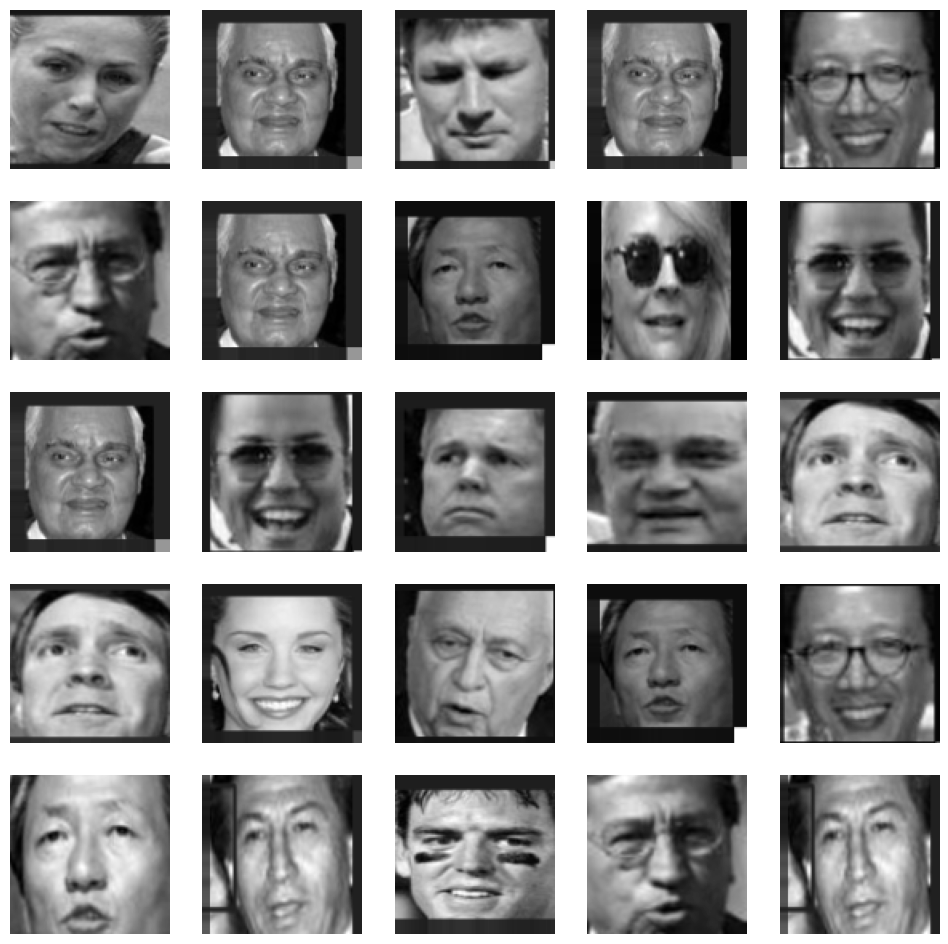

In [276]:
# plt.imshow(au_x[0], cmap='gray')
# plt.axis('off')
data = ImageDataGenerator(rescale=1./255.,
                                  #  rotation_range=10,
                                  #  width_shift_range=0.25,
                                  #  height_shift_range=0.25,
                                  #  shear_range=0.1,
                                   zoom_range=0.25,
                                  #  horizontal_flip=False
                          ).flow(X_train, y_train)
au_x, au_y = data.next()[0].reshape(32,100,100), data.next()[1]
au_x.shape, au_y.shape
plot_aug(au_x)